### Aim

The aim of this project is to determine how accurately we can predict handwritten digits from the sklearn digits dataset

In [57]:
# Import dataset
from sklearn.datasets import load_digits

# Import necessary libraries
import numpy as np
import pandas as pd

# Import load_digits() from sklearn.datasets
digits = load_digits()

data = pd.DataFrame(digits["data"])
    
labels = pd.Series(digits["target"])

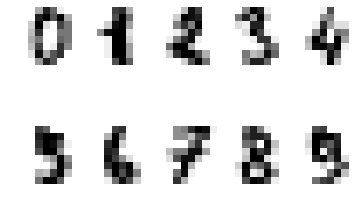

In [88]:
# Visualise some of the images
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

images= []
for row in digits["data"]:  
    # Reshape the row into an 8 by 8 grid
    image = row.reshape(8,8)
    # Transform the numpy 2d array into a pandas dataframe
    image = pd.DataFrame(image)
    images.append(image)

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    image = images[i]
    ax.imshow(image, cmap='gray_r')
    ax.axis("off")

In [89]:
# Build a classifier using the k-nearest neighbours algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(n_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return overall_accuracy
    
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.iloc[train_index], labels.iloc[train_index]
        test_features, test_labels = data.iloc[test_index], labels.iloc[test_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

k_one = cross_validate(1)
        
av_accuracy = np.mean(k_one)
    
print(av_accuracy)

0.9677233358079684


In [90]:
# Experiment with different k values
k_dict = {}

for k in range(1,11):
    k_dict[k] = np.mean(cross_validate(k))
    
print(k_dict)

{1: 0.9677233358079684, 2: 0.9616010888393962, 3: 0.9627183865379857, 4: 0.9649480326651819, 5: 0.9621665429349171, 6: 0.9588270230141054, 7: 0.9571591190299431, 8: 0.9571578817124474, 9: 0.9543801039346697, 10: 0.9527097253155159}


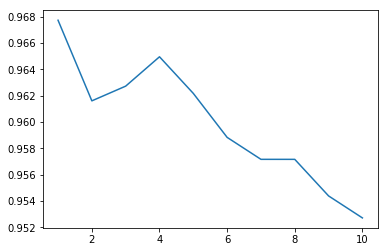

In [91]:
plt.plot(k_dict.keys(), k_dict.values())

Thus it appears 1 is the optimal k value

In [108]:
# Build a classifier using a neural network

from sklearn.neural_network import MLPClassifier

def nn_train(train_features, train_labels, hidden_layer_sizes=(100, ), activation="logistic"):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=50)
    model.fit(train_features, train_labels)
    return model

def nn_cross_validate(hidden_layer_sizes=(100, ), activation="logistic"):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.iloc[train_index], labels.iloc[train_index]
        test_features, test_labels = data.iloc[test_index], labels.iloc[test_index]
        model = nn_train(train_features, train_labels, hidden_layer_sizes=hidden_layer_sizes, activation=activation)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

In [109]:
# Experiment with different hidden layer sizes values
nn_dict = {}

for neurons in [8,16,32,64,128,256]:
    nn_dict[neurons] = np.mean(nn_cross_validate(hidden_layer_sizes=(neurons, )))
    
print(nn_dict)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

{8: 0.7918448403860431, 16: 0.887582281613462, 32: 0.9276540460282108, 64: 0.9404528582034151, 128: 0.9499133877753031, 256: 0.9526948775055679}


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


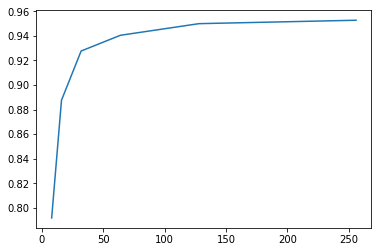

In [110]:
plt.plot(nn_dict.keys(), nn_dict.values())

In [111]:
# Try the relu activation function
for neurons in [8,16,32,64,128,256,512]:
    nn_dict[neurons] = np.mean(nn_cross_validate(hidden_layer_sizes=(neurons, ), activation="relu"))
    
print(nn_dict)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

{8: 0.5503006681514477, 16: 0.7990658252907696, 32: 0.9020477604553329, 64: 0.9293219500123733, 128: 0.9365664439495175, 256: 0.9510244988864143, 512: 0.9543664934422174}


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


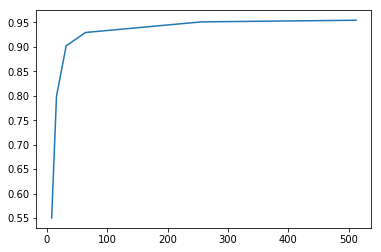

In [112]:
plt.plot(nn_dict.keys(), nn_dict.values())

Results:

So far the KNN model is outperforming the NN model but as can be seen from the graphs, the KNN model's accuracy is decreasing as k increases indicating a maximum accuracy of 0.9677233358079684 while the NN model is shows increasing accuracy as the number of neurons increases with the best so far being 0.9532516703786191 for 256 neurons.

Thus it bears further testing to see if either model's accuracy can be increased. 

But first, let's test if either model is prone to overfit

In [113]:
# modify the cross validation functions to use train for testing

# KNN
def cross_validate_train(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.iloc[train_index], labels.iloc[train_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, train_features, train_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

# NN
def nn_cross_validate_train(hidden_layer_sizes=(100, ), activation="logistic"):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, train_labels = data.iloc[train_index], labels.iloc[train_index]
        model = nn_train(train_features, train_labels, hidden_layer_sizes=hidden_layer_sizes, activation=activation)
        accuracy = test(model, train_features, train_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

In [114]:
k_dict = {}

for k in range(1,4):
    k_dict[k] = np.mean(cross_validate_train(k))
    
print(k_dict)

{1: 1.0, 2: 0.9907254884466855, 3: 0.9933220652995226}


In [116]:
nn_dict = {}

for neurons in [8,16,32,64]:
    nn_dict[neurons] = np.mean(nn_cross_validate_train(hidden_layer_sizes=(neurons, )))
    
print(nn_dict)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

{8: 0.8211863267972128, 16: 0.9372987064341244, 32: 0.9723616499133144, 64: 0.9892409828192775}


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Results:

Thus we can see that there's an element of overfitting in each of the models with more in the KNNmodel than the NN model as would be expected.

In [119]:
# Add a second layer of neurons to the NN model and see if this increases accuracy
np.mean(nn_cross_validate(hidden_layer_sizes=(128, 128)))

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9972174124717197

Result:

As we can see, adding a second layer to the neural network has the effect of vastly increasing the accuracy of the model.

In [122]:
# Set activation function to relu
np.mean(nn_cross_validate(hidden_layer_sizes=(128, 128), activation="relu"))

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0

Result:

Thus we see that with a two layer, 128 by 128 neuron mlp model, we can determine the digit with 100% accuracy